<h1>DATA ANALYTICS PROJECT </h1>

<h2>UNITED KINGDOM ROAD ACCIDENT DATA ANALYTICS</h2>
<h3>Inclusie year: 2019 - 2020</h3>
<h4>Analyst : Mark Eugine M. Casañada</h4>

<hr style="backgroundcolor:'green'">

<h2>IMPORTING NECESSARY MODULES</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway


import warnings
warnings.filterwarnings('ignore')

<hr>

<h2>CONVERTING TO DATAFRAME</h2>

In [2]:
df = pd.read_csv('dataset\\accident_data.csv')

<hr>

<h2>DATA PREPERATION</h2>

In [3]:
df.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [5]:
df.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

<h3>DEALING WITH NULL VALUES</h3>

In [6]:
df.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h4>FILL UP THE NULL VALUES</h4>

In [7]:
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mode()[0])

df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mode()[0])

df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].fillna('uncouted')

df['Road_Type'] = df['Road_Type'].fillna('uncouted')

df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].fillna('Unallocated')

df['Weather_Conditions'] = df['Weather_Conditions'].fillna('uncouted')

In [8]:
df.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h3>CONVERTING OBJECT TO DATETIME DATA TYPE</h3>

In [9]:
df['Accident Date'] = pd.to_datetime(df['Accident Date'], dayfirst=True, errors='coerce')

In [10]:
df.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h3>EXTRACTING DATE INFORMATION USING PANDAS DATA TIME</h3>

In [11]:
df['Year'] = df['Accident Date'].dt.year
df['Month'] = df['Accident Date'].dt.month
df['Day'] = df['Accident Date'].dt.day
df['DayOfWeek'] = df['Accident Date'].dt.dayofweek

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  object        
 10  Road_Type                660679 non-null  object        
 11  Urban_or_Rural_Area      660679 non-null  object        
 12  Weather_Conditio

<h3>CHANGING THE DAY AND MONTH INTO PROPER VALUE</h3>

In [13]:
df['DayOfWeek'].value_counts()

DayOfWeek
5    107178
2     99558
3     99511
4     97900
1     94550
6     89302
0     72680
Name: count, dtype: int64

In [14]:
accident_per_day = df['DayOfWeek'].value_counts().sort_index()

day_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accident_per_day.index = accident_per_day.index.map(day_map)

accident_per_day

DayOfWeek
Monday        72680
Tuesday       94550
Wednesday     99558
Thursday      99511
Friday        97900
Saturday     107178
Sunday        89302
Name: count, dtype: int64

In [15]:
accident_per_month = df['Month'].value_counts().sort_index()

month_map = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

accident_per_month.index = accident_per_month.index.map(month_map)

accident_per_month

Month
January      52872
February     49491
March        54086
April        51744
May          56352
June         56481
July         57445
August       53913
September    56455
October      59580
November     60424
December     51836
Name: count, dtype: int64

<hr>

<h3>CHANGING DATA TYPES TO VALID DATATYPE</h3>

In [16]:
df['Accident_Severity'] = df['Accident_Severity'].astype('category')

df['Latitude'] = df['Latitude'].astype('category')

df['Light_Conditions'] = df['Light_Conditions'].astype('category')

df['District Area'] = df['District Area'].astype('category')

df['Longitude'] = df['Longitude'].astype('category')

df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].astype('category')

df['Road_Type'] = df['Road_Type'].astype('category')

df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].astype('category')

df['Weather_Conditions'] = df['Weather_Conditions'].astype('category')

df['Vehicle_Type'] = df['Vehicle_Type'].astype('category')

df['Year'] = df['Year'].astype('category')

df['Month'] = df['Month'].astype('category')

df['Day'] = df['Day'].astype('category')

df['DayOfWeek'] = df['DayOfWeek'].astype('category')

In [17]:
df.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                        category
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
Year                             category
Month                            category
Day                              category
DayOfWeek                        category
dtype: object

<hr>

<h1>GENERATE 20 INSIGHTS</h1>

<h2 style='color: Blue;'>UNIVARIATE</h2>

<h3><span style='color: Green;'>QUESTION 1</span> : How much accident happends on 2022 from the totality from year 2019-2022?</h3>

In [18]:
df_2022 = df[df['Year'] == 2022]
df_total_2022 = df_2022.value_counts().sum()

df_total_year = df['Year'].value_counts().sum()

percentage_2022 = np.round((df_total_2022 / df_total_year) * 100, 2)

print(f'The total number of accident that occur in 2022 is {df_total_2022} which is {percentage_2022} of {df_total_year}.')

The total number of accident that occur in 2022 is 144419 which is 21.86 of 660679.


<h3><span style='color: Red;'>INSIGHT #1 :</span> In 2022, a total of 144,419 accidents were recorded, accounting for 21.86% of the 660,679 accidents that occurred between 2019 and 2022. This figure provides insight into the distribution of accidents over the years and may indicate trends in road safety, enforcement measures, or other influencing factors.</h3>

<h3><span style='color: yellow;'>INSIGHT #1 :</span> VISUALIZATION</h3>

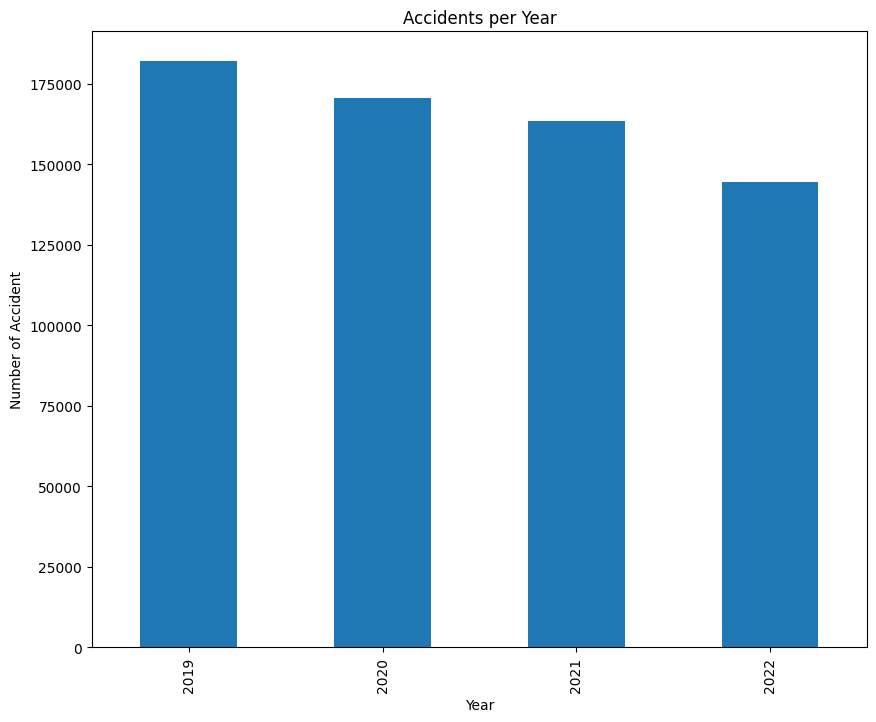

In [19]:
accident_per_year = df['Year'].value_counts().sort_index()

accident_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accident')
plt.style.use('ggplot')
plt.gcf().set_size_inches(10, 8)
plt.show()

<hr>

<h3><span style='color: Green;'>QUESTION 2</span> : Is the accident got worst in the last 4 years?</h3>

In [20]:
df_2019 = df[df['Year'] == 2019]
total_row_2019 = df_2019.value_counts().sum()

df_total_row = df['Year'].value_counts().sum()

x = total_row_2019/df_total_row

print(f"The total accident that happen in 2019 is {total_row_2019} which is {np.round(x * 100, 2)}% of the total accident that happen in the past 4 years, 2019-2022.")

The total accident that happen in 2019 is 182115 which is 27.56% of the total accident that happen in the past 4 years, 2019-2022.


<h3><span style='color: yellow;'>INSIGHT #2 :</span> VISUALIZATION</h3>

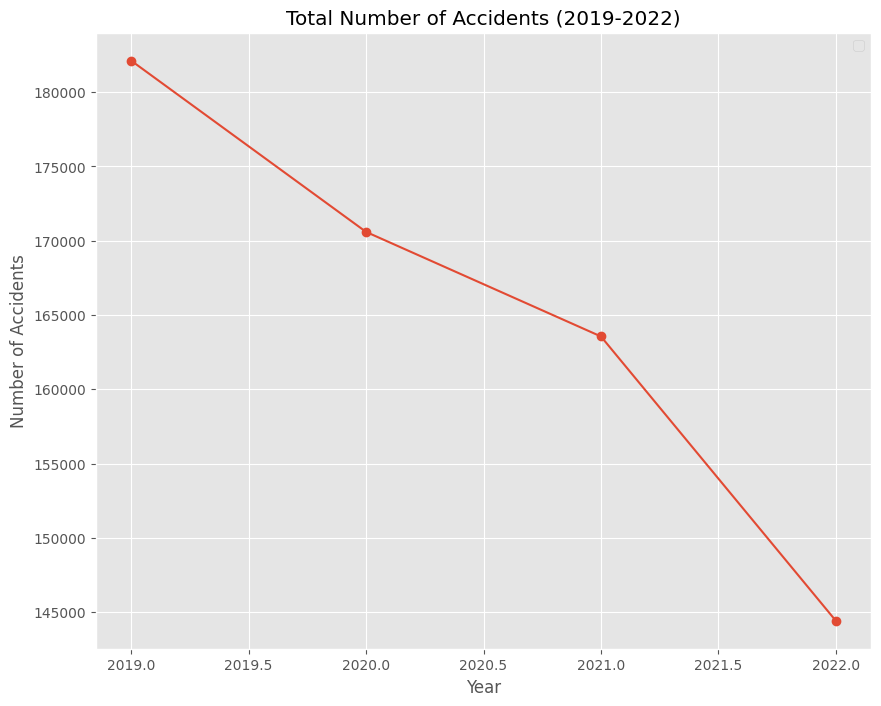

In [21]:
accident_count = df['Year'].value_counts()

plt.plot(accident_count.index, accident_count.values, marker='o')

plt.title("Total Number of Accidents (2019-2022)")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.gcf().set_size_inches(10, 8)
plt.legend()
plt.show()


<h3><span style='color: Red;'>INSIGHT #2 :</span> Between 2019 and 2022, 27.56% of recorded accidents occurred in 2019, while the percentage dropped to 21.86% in 2022. This decline suggests an overall improvement in safety, possibly due to enhanced regulations, better infrastructure, or increased awareness. Analyzing the factors behind this trend could provide valuable insights for further reducing accident rates.</h3>

<hr>

<h3><span style='color: Green;'>QUESTION 3</span> : Day of the week the accident more likely to occur.</h3>

In [22]:
total_dow = df['DayOfWeek'].value_counts().sum()

saturday_n_acc = df['DayOfWeek'].value_counts().max()

saturday_rate = np.round((saturday_n_acc/total_dow) * 100, 2)

print(saturday_rate)

df['DayOfWeek'].value_counts()

16.22


DayOfWeek
5    107178
2     99558
3     99511
4     97900
1     94550
6     89302
0     72680
Name: count, dtype: int64

<h3><span style='color: Red;'>INSIGHT #3 :</span> The analysis reveals that accidents occur most frequently on Saturdays, with a total of 107,178 incidents, accounting for 16.22% of all recorded accidents. This suggests that weekends, particularly Saturdays, may have higher risk factors, potentially due to increased traffic, leisure activities, or other contributing elements.</h3>

<h3><span style='color: yellow;'>INSIGHT #3 :</span> VISUALIZATION</h3>

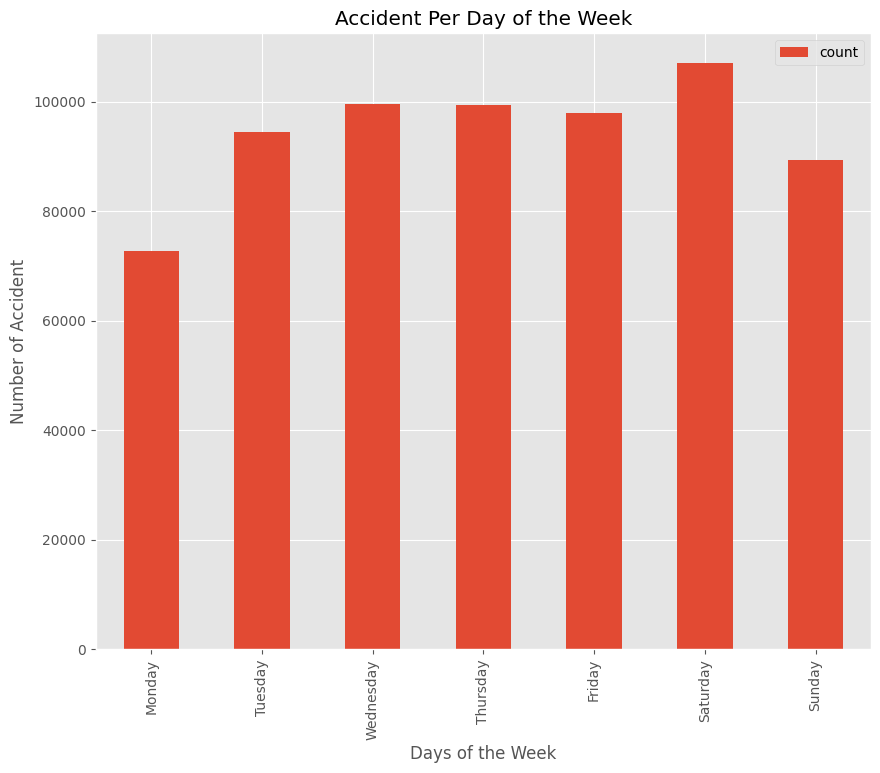

In [23]:
accident_per_day.plot(kind='bar')
plt.title('Accident Per Day of the Week')
plt.xlabel('Days of the Week')
plt.ylabel('Number of Accident')
plt.gcf().set_size_inches(10, 8)
plt.legend()
plt.show()

<hr>

<h3><span style='color: Green;'>QUESTION 4</span> : Under what weather condition does most accident occurs?</h3>

In [24]:
total_wc = df['Weather_Conditions'].value_counts().sum()

fine_no_winds = df['Weather_Conditions'].value_counts().max()

f_no_winds = np.round((fine_no_winds/total_wc) * 100, 2)

print(f_no_winds)

df['Weather_Conditions'].value_counts()

78.84


Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
uncouted                  14128
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<h3><span style='color: Red;'>INSIGHT #4 :</span> The analysis indicates that the majority of accidents occurred under fine weather conditions with no high winds, totaling 535,013 incidents, which accounts for 80.98% of all recorded accidents. This suggests that adverse weather is not always a primary factor in accidents, highlighting the need to consider other contributors such as human error, road conditions, and traffic density.</h3>

<h3><span style='color: yellow;'>INSIGHT #4 :</span> VISUALIZATION</h3>

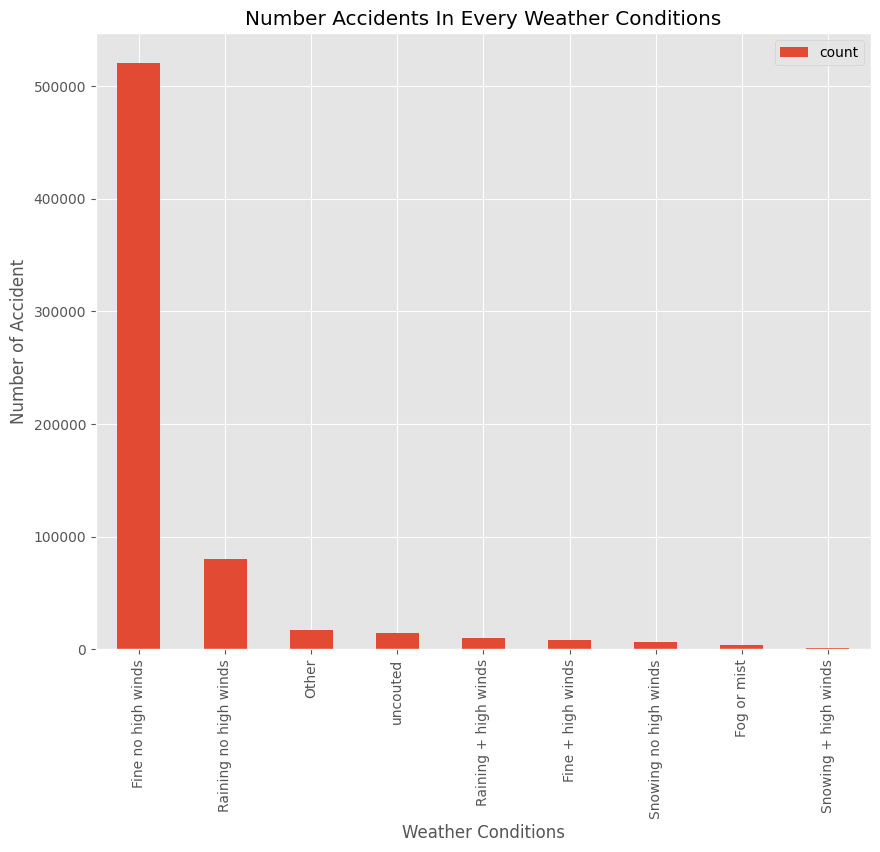

In [25]:
weather_conditions_acc = df['Weather_Conditions'].value_counts()

weather_conditions_acc.plot(kind='bar')
plt.title('Number Accidents In Every Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accident')
plt.gcf().set_size_inches(10, 8)
plt.legend()
plt.show()

<hr>

<h3><span style='color: Green;'>QUESTION 5</span> : Under what road type does most accident occurs?</h3>

In [26]:
total_rt = df['Road_Type'].value_counts().sum()

single_carriageway = df['Road_Type'].value_counts().max()

single_c_rt = np.round((single_carriageway/total_rt) * 100, 2)

print(single_c_rt)

df['Road_Type'].value_counts()

74.49


Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
uncouted                4520
Name: count, dtype: int64

<h3><span style='color: Red;'>INSIGHT #5 :</span> The analysis reveals that the majority of accidents occurred on single carriageway roads, with a total of 496,663 incidents, accounting for 75.17% of all recorded accidents. This suggests that single carriageways may pose higher risks, potentially due to factors such as limited lanes, lack of central barriers, or higher traffic density. Further investigation into road design and traffic management could help improve safety in these areas.</h3>

<h3><span style='color: yellow;'>INSIGHT #5 :</span> VISUALIZATION</h3>

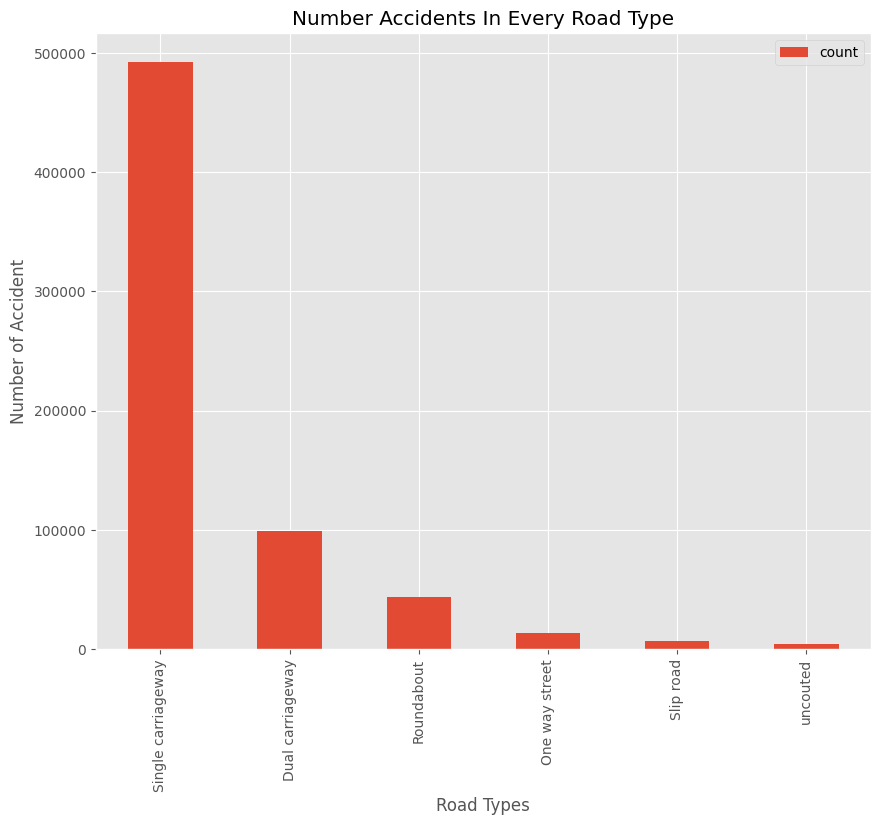

In [27]:
road_type_acc = df['Road_Type'].value_counts()

road_type_acc.plot(kind='bar')
plt.title('Number Accidents In Every Road Type')
plt.xlabel('Road Types')
plt.ylabel('Number of Accident')
plt.gcf().set_size_inches(10, 8)
plt.legend()
plt.show()

<hr>

<h3><span style='color: Green;'>QUESTION 6</span> : Under what road surface conditions does most accident occurs?</h3>

In [28]:
total_rsc = df['Road_Surface_Conditions'].value_counts().sum()

dry = df['Road_Surface_Conditions'].value_counts().max()

dry_surface = np.round((dry/total_rsc) * 100, 2)

print(dry_surface)

df['Road_Surface_Conditions'].value_counts()

67.78


Road_Surface_Conditions
Dry                     447821
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
uncouted                   726
Name: count, dtype: int64

<h3><span style='color: Red;'>INSIGHT #6 :</span> The analysis indicates that the majority of accidents occurred on dry road surfaces, totaling 448,547 incidents, which accounts for 67.89% of all recorded accidents. This suggests that road surface conditions alone may not be the primary cause of accidents, emphasizing the need to consider other factors such as driver behavior, traffic volume, and road design.</h3>

<h3><span style='color: yellow;'>INSIGHT #6 :</span> VISUALIZATION</h3>

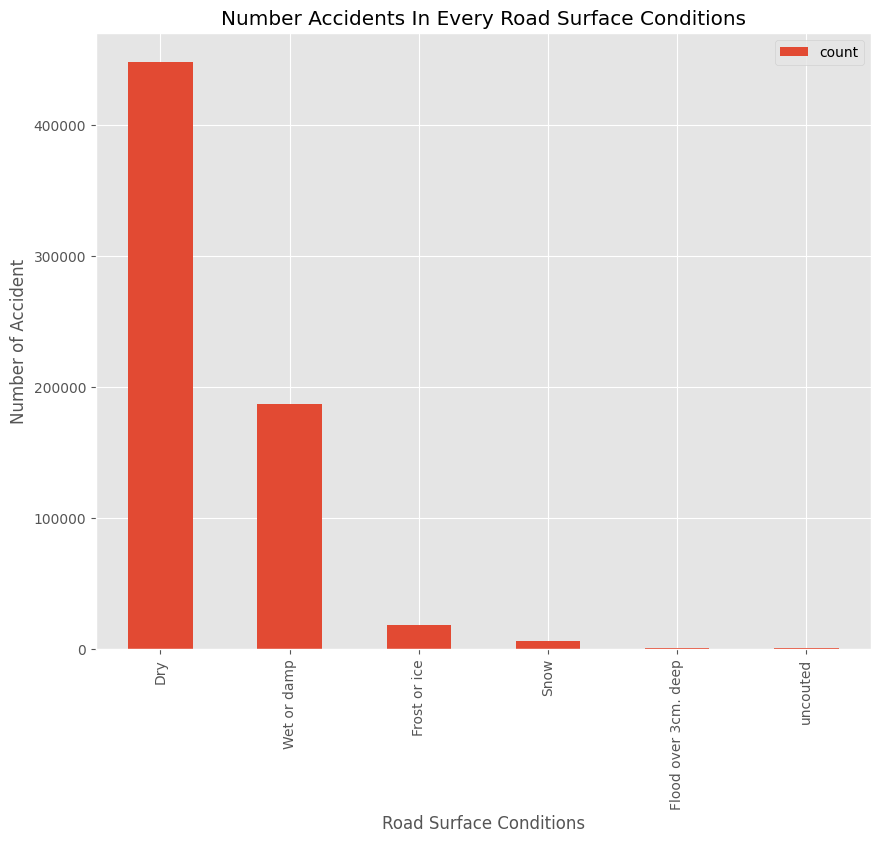

In [29]:
road_surface_conditions_acc = df['Road_Surface_Conditions'].value_counts()

road_surface_conditions_acc.plot(kind='bar')
plt.title('Number Accidents In Every Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accident')
plt.gcf().set_size_inches(10, 8)
plt.legend()
plt.show()

<hr>

<h2 style='color: Blue;'>BIVARIATE</h2>

<h3><span style='color: Green;'>QUESTION 7</span> : What is the light condition where the severity is categorize as fatal? </h3>

In [30]:
light_conditions = df['Light_Conditions']

fatal = df[df['Accident_Severity'] == 'Fatal']

fatal['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       5076
Darkness - lights lit          1860
Darkness - no lighting         1612
Darkness - lighting unknown      68
Darkness - lights unlit          45
Name: count, dtype: int64

<h3><span style='color: Red;'>INSIGHT #7 :</span> The analysis reveals that <i>"FATAL"</i> accidents occur most frequently under daylight conditions, with a total of 5,076 incidents. This suggests that visibility alone is not a primary factor in accident severity. Additionally, while daylight accounts for the highest number of accidents overall, darkness with unlit roads records the lowest, indicating that lower traffic volume at night may contribute to fewer incidents. </h3>

<h3><span style='color: yellow;'>INSIGHT #7 :</span> VISUALIZATION</h3>

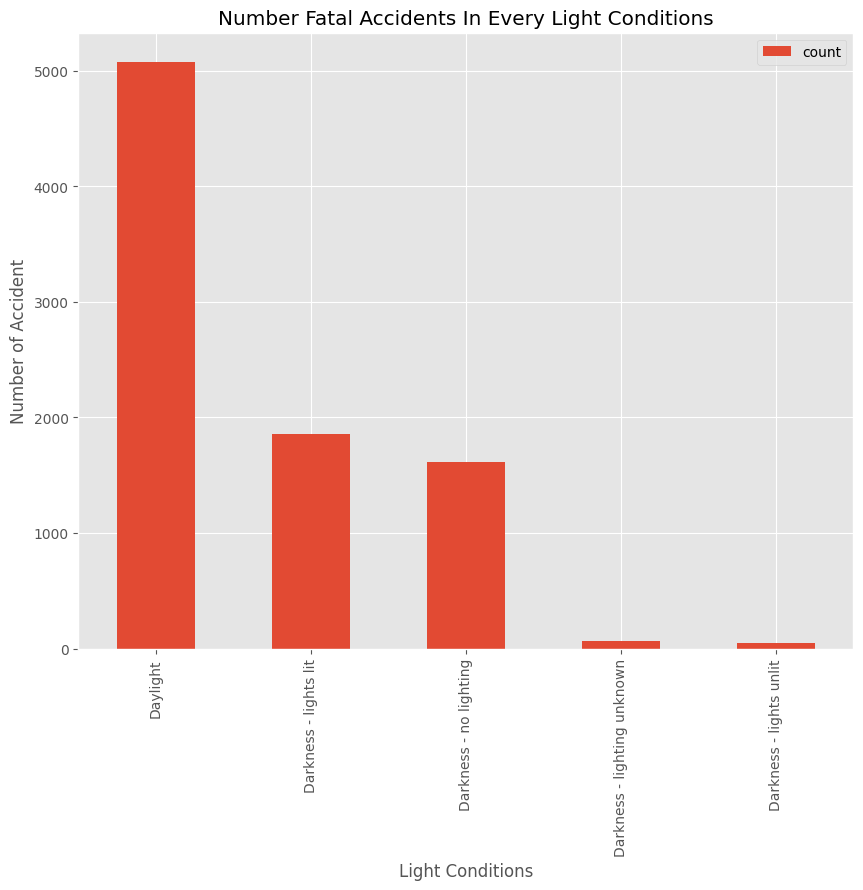

In [31]:
acc_severity = df[df['Accident_Severity'] == 'Fatal']
light_conditions_fatal = acc_severity['Light_Conditions'].value_counts()

light_conditions_fatal.plot(kind='bar')
plt.title('Number Fatal Accidents In Every Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accident')
plt.gcf().set_size_inches(10, 8)
plt.legend()
plt.show()

<hr>

<h3><span style='color: Green;'>QUESTION 8</span> : What type vehicle often involve in accident during Saturday which is has the highest number of accident occurrencies weekly?</h3>

In [32]:
sat_df = df[df['DayOfWeek'] == 'Saturday']
car = sat_df[sat_df['Vehicle_Type'] == 'Car'].value_counts().sum()

car_rate_sat = np.round((car / sat_df.value_counts().sum()) * 100, 2)

print('Car vehicle type has the most number of accident during saturday.')
print(f'{car_rate_sat} %')
sat_df['Vehicle_Type'].value_counts()

Car vehicle type has the most number of accident during saturday.
nan %


Vehicle_Type
Agricultural vehicle                     0
Bus or coach (17 or more pass seats)     0
Car                                      0
Data missing or out of range             0
Goods 7.5 tonnes mgw and over            0
Goods over 3.5t. and under 7.5t          0
Minibus (8 - 16 passenger seats)         0
Motorcycle 125cc and under               0
Motorcycle 50cc and under                0
Motorcycle over 125cc and up to 500cc    0
Motorcycle over 500cc                    0
Other vehicle                            0
Pedal cycle                              0
Ridden horse                             0
Taxi/Private hire car                    0
Van / Goods 3.5 tonnes mgw or under      0
Name: count, dtype: int64

<h3><span style='color: Red;'>INSIGHT #8 :</span> The analysis reveals that cars are the most frequently involved vehicle type in accidents occurring on Saturdays, accounting for 75.16% (80,558 accidents) out of the total 107,178 Saturday accidents. This suggests that weekends, particularly Saturdays, see a higher volume of car-related incidents, possibly due to increased travel and leisure activities.</h3>

<h3><span style='color: yellow;'>INSIGHT #8 :</span> VISUALIZATION</h3>

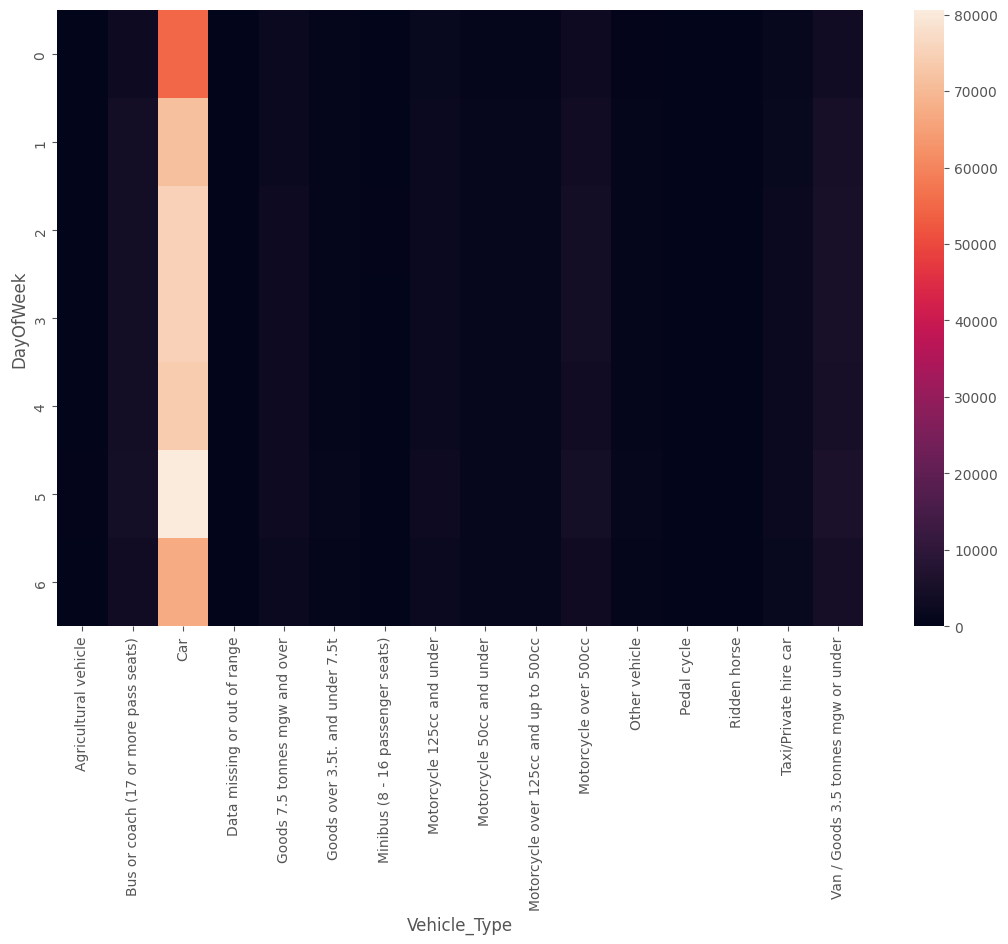

In [33]:
type_dayofweek_vh = df.groupby(['DayOfWeek', 'Vehicle_Type']).size().unstack()
plt.gcf().set_size_inches(13, 8)
sns.heatmap(type_dayofweek_vh)
plt.show()

<hr>

<h3><span style='color: Green;'>QUESTION 9</span> : What is the average casualties where only 2 vehicle is involve?</h3>

In [34]:
two_vehicle = df[(df['Number_of_Vehicles'] == 2)]

two_vehicle_ave_casualties = np.round(two_vehicle['Number_of_Casualties'].mean(), 2)
two_vehicle_ave_casualties

np.float64(1.37)

<h3><span style='color: Red;'>INSIGHT #9 :</span> The analysis shows that the average number of Casualties per accident is 1.37. This is accidents where two vehicles are involve and account for the highest number of incidents, emphasizing the need for improved road safety measures and driver awareness to reduce accident.</h3>

<h3><span style='color: yellow;'>INSIGHT #9 :</span> VISUALIZATION</h3>

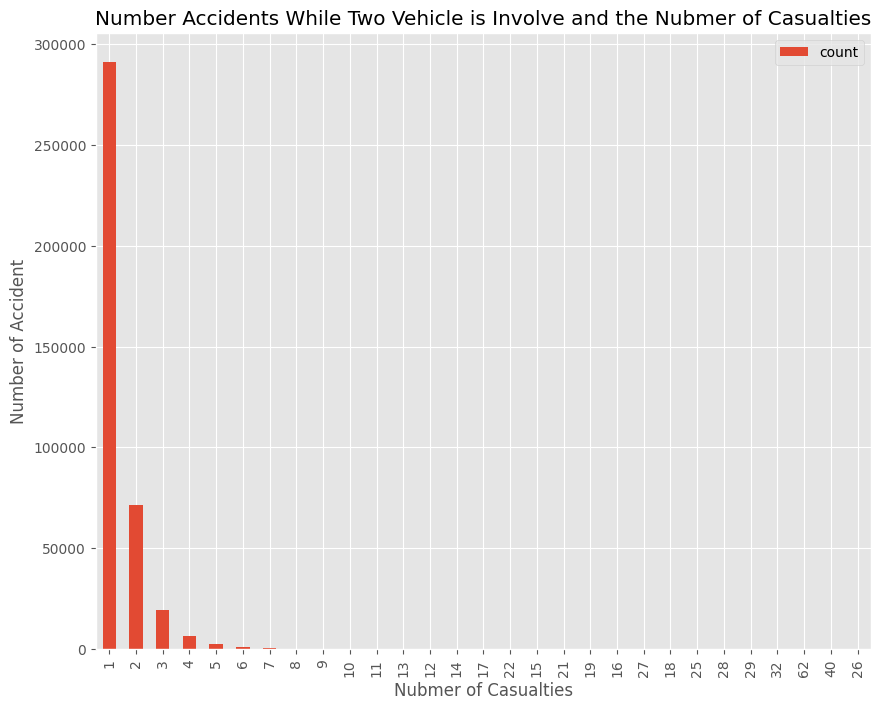

In [35]:
two_vehicle_number_casualties = two_vehicle['Number_of_Casualties'].value_counts()

two_vehicle_number_casualties.plot(kind='bar')
plt.title('Number Accidents While Two Vehicle is Involve and the Nubmer of Casualties')
plt.xlabel('Nubmer of Casualties')
plt.ylabel('Number of Accident')
plt.gcf().set_size_inches(10, 8)
plt.legend()
plt.show()

<hr>

<h3><span style='color: Green;'>QUESTION 10</span> : What is the total number of fatal accidemt that happen in urban area?</h3>

In [36]:
urban_fatal = df[(df['Urban_or_Rural_Area'] == 'Urban') & (df['Accident_Severity'] == 'Fatal')].value_counts().sum()

rural_total_accident = df[df['Urban_or_Rural_Area'] == 'Urban'].value_counts().sum()

fatal_rate_raral = np.round((urban_fatal / rural_total_accident) * 100, 2)

print(f'The recorded accident in Urban area which resulted to Fatal severity is {urban_fatal} which is only {fatal_rate_raral}% of the total accident recorded {rural_total_accident}.')

The recorded accident in Urban area which resulted to Fatal severity is 3060 which is only 0.73% of the total accident recorded 421663.


<h3><span style='color: Red;'>INSIGHT #10 :</span> The recorded number of fatal accidents in urban areas is 3,060, making up only 0.73% of the total 421,663 accidents. This suggests that while urban areas experience a high volume of accidents, the proportion of fatal incidents remains relatively low. Factors such as lower driving speeds, traffic regulations, and quicker emergency response may contribute to this trend.</h3>

<h3><span style='color: yellow;'>INSIGHT #10 :</span> VISUALIZATION</h3>

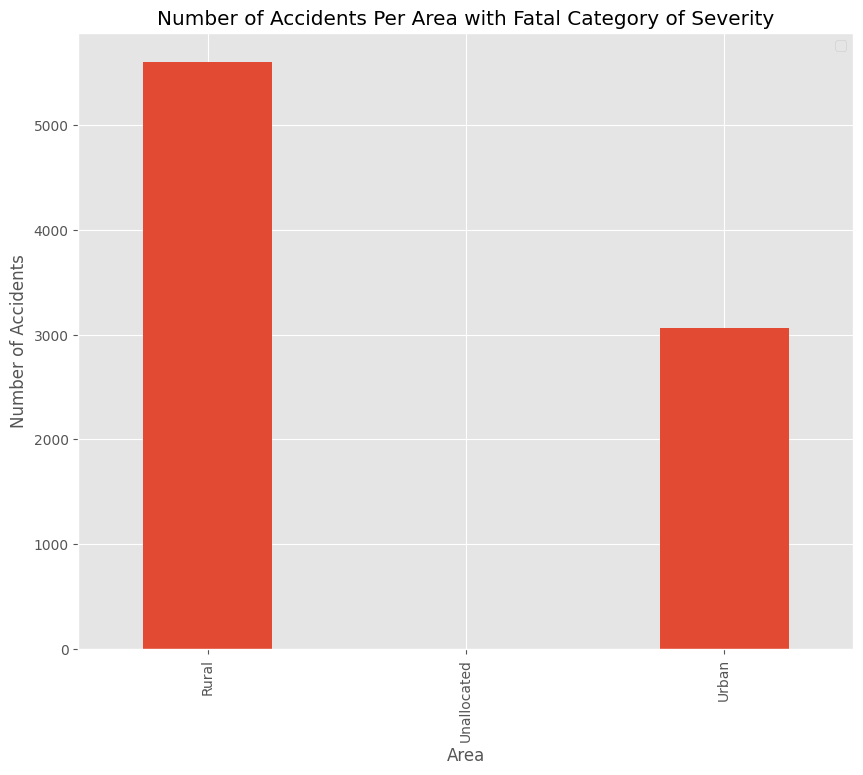

In [37]:
fatal_acc_area = df[df['Accident_Severity'] == 'Fatal']

accident_per_month_severity = fatal_acc_area.groupby(['Urban_or_Rural_Area']).size()

accident_per_month_severity.plot(kind='bar')

plt.title('Number of Accidents Per Area with Fatal Category of Severity')
plt.xlabel('Area')
plt.ylabel('Number of Accidents')
plt.gcf().set_size_inches(10, 8)
plt.legend()
plt.show()

<hr>

<h3><span style='color: Green;'>QUESTION 11</span> : Averange accident per day of the week which a Car type vehicle got involve</h3>

In [38]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

number_of_acc = [df[(df['DayOfWeek'] == i) & (df['Vehicle_Type'] == 'Car')].value_counts().sum() for i in days]

car_total_dt = df[df['Vehicle_Type'] == 'Car'].value_counts().sum()

for num, day in zip(number_of_acc, days):
    rate = np.round((num / car_total_dt) * 100, 2)
    
    print(f'{day} : {num} ({rate}%)')

print(f'The total number of accident with car type vehicle is {car_total_dt}.')

Monday : 0 (0.0%)
Tuesday : 0 (0.0%)
Wednesday : 0 (0.0%)
Thursday : 0 (0.0%)
Friday : 0 (0.0%)
Saturday : 0 (0.0%)
Sunday : 0 (0.0%)
The total number of accident with car type vehicle is 497992.


<h3><span style='color: Red;'>INSIGHT #11 :</span> The analysis indicates that Saturday has the highest number of car-related accidents, accounting for 16.18% (80,558 accidents) of the total 497,992 car accidents recorded. This aligns with the trend of increased road activity on weekends, possibly due to leisure travel and social gatherings. Meanwhile, Monday records the lowest number of car accidents (11.04% or 54,957 accidents), suggesting reduced travel frequency at the start of the workweek. The data highlights a consistent increase in accidents from Monday to Saturday, peaking on weekends, which may indicate a correlation between road congestion and accident frequency.</h3>

<h3><span style='color: yellow;'>INSIGHT #11 :</span> VISUALIZATION</h3>

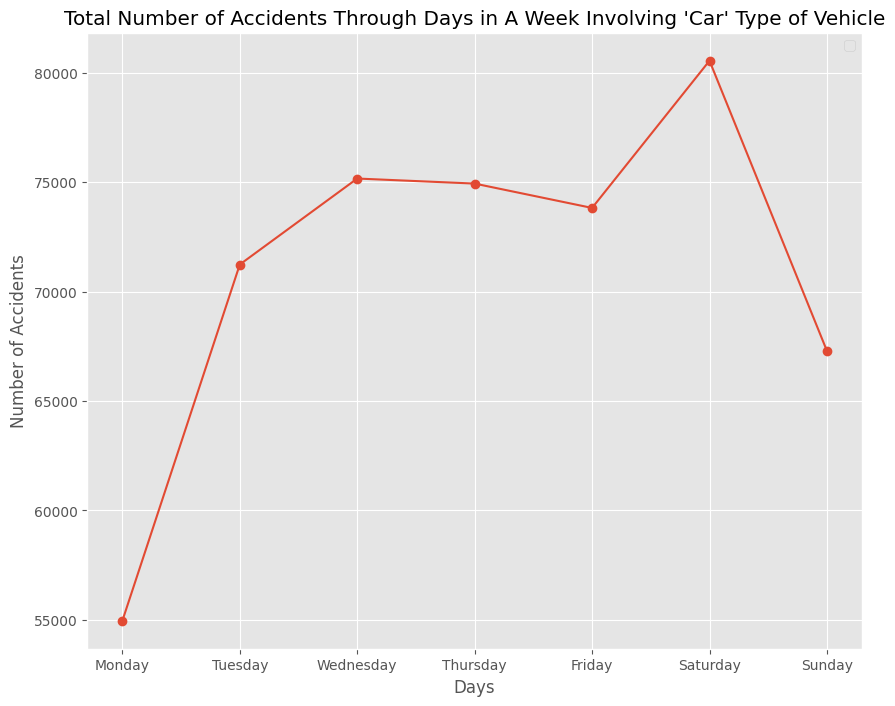

In [39]:
car_type_df_11 = df[df['Vehicle_Type'] == 'Car']

accident_per_day_car_11 = car_type_df_11['DayOfWeek'].value_counts().sort_index()

accident_per_day_car_11.index = accident_per_day_car_11.index.map(day_map)

plt.plot(accident_per_day_car_11.index, accident_per_day_car_11.values, marker='o')

plt.title("Total Number of Accidents Through Days in A Week Involving 'Car' Type of Vehicle")
plt.xlabel("Days")
plt.ylabel("Number of Accidents")
plt.gcf().set_size_inches(10, 8)
plt.legend()
plt.show()


<hr>

<h3><span style='color: Green;'>QUESTION 12</span> : Is there any correlation between number of casualties to the number of vehicles involve in an accident?</h3>

In [40]:
df['Number_of_Casualties'].corr(df['Number_of_Vehicles'])

np.float64(0.2288888612692756)

<h3><span style='color: Red;'>INSIGHT #12 :</span> The analysis suggests that there is no strong correlation between the number of casualties and the number of vehicles involved in an accident. This indicates that a higher number of vehicles in a crash does not necessarily result in more casualties. Other factors, such as impact severity, vehicle type, safety measures, and road conditions, may play a more significant role in determining casualty numbers rather than just the number of vehicles involved.</h3>

<h3><span style='color: yellow;'>INSIGHT #12:</span> VISUALIZATION</h3>

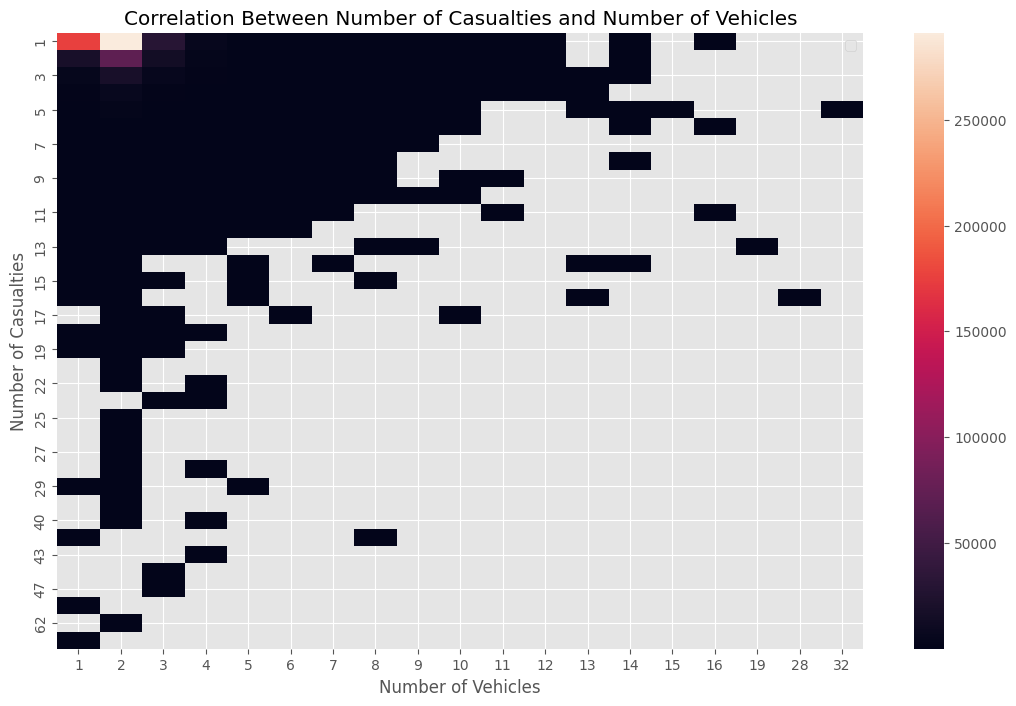

In [41]:
number_casualties_vehicles = df.groupby(['Number_of_Casualties','Number_of_Vehicles']).size().unstack()
sns.heatmap(number_casualties_vehicles)
plt.title('Correlation Between Number of Casualties and Number of Vehicles')
plt.gcf().set_size_inches(13,8)
plt.ylabel('Number of Casualties')
plt.xlabel('Number of Vehicles')
plt.legend()
plt.show()

<hr>

<h3><span style='color: Green;'>QUESTION 13</span> : Is there any correlation between different accident severity and the number of casualties?</h3>

In [42]:
df['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

In [43]:
fatal = df[df['Accident_Severity'] == 'Fatal']['Number_of_Casualties']
serious = df[df['Accident_Severity'] == 'Serious']['Number_of_Casualties']
slight = df[df['Accident_Severity'] == 'Slight']['Number_of_Casualties']

f_stat, p_value = f_oneway(fatal, serious, slight)

print(f"P-value: {p_value}")

P-value: 0.0


<h3><span style='color: Red;'>INSIGHT #13 :</span> The P-value of 0.0 suggests an extremely strong statistical significance, indicating that the relationship between the variables is not due to random chance. In terms of correlation, this implies that there is a strong dependency between the categorical and numerical variables being analyzed. The lower the P-value, the stronger the evidence that changes in one variable are systematically linked to differences in the other.</h3>

<h3><span style='color: yellow;'>INSIGHT #13:</span> VISUALIZATION</h3>

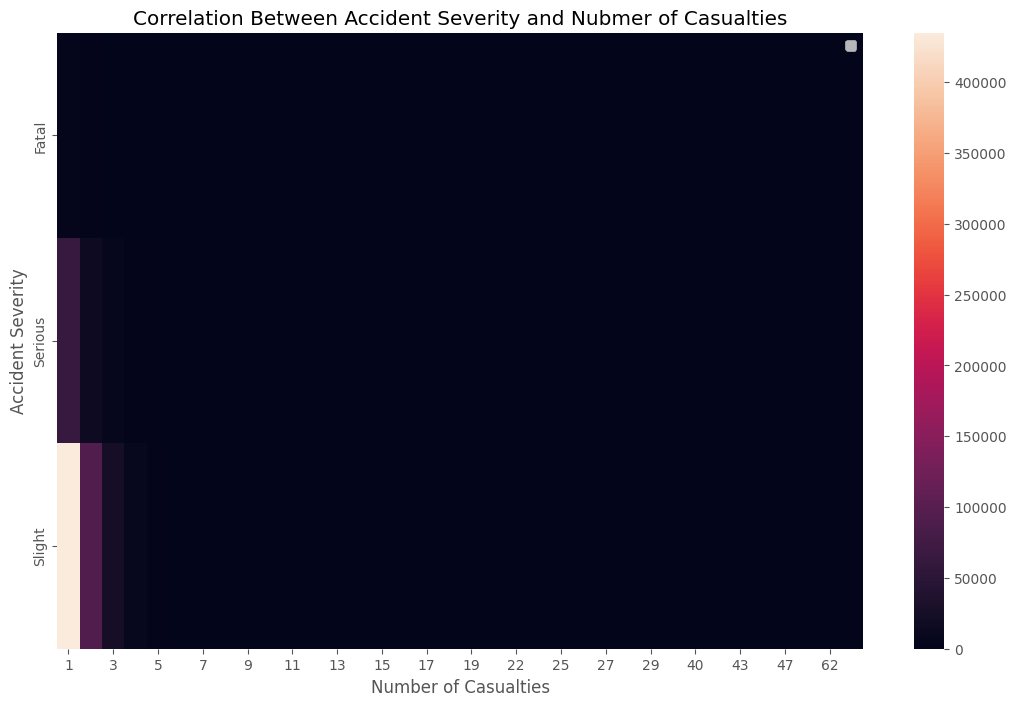

In [44]:
all_acc_severity_num_casualties = df.groupby(['Accident_Severity', 'Number_of_Casualties']).size().unstack()
sns.heatmap(all_acc_severity_num_casualties)
plt.title('Correlation Between Accident Severity and Nubmer of Casualties')
plt.gcf().set_size_inches(13,8)
plt.ylabel('Accident Severity')
plt.xlabel('Number of Casualties')
plt.legend()
plt.show()

<hr>

<h2 style='color: Blue;'>MULTIVARIATE</h2>

<h3><span style='color: Green;'>QUESTION  14</span> : What year got the highest number of accident occurrences?</h3>

In [45]:
print('Number of accident each year:')
df['Year'].value_counts()

Number of accident each year:


Year
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

In [46]:
print('Rate of each year in number of accident:')

total = df['Year'].value_counts().sum()

starting_year = 2019
for i in range(4):
    year = starting_year + i
    year_data = df[df['Year'] == year].value_counts().sum()
    print(f'{year} : {np.round((year_data / total) * 100, 2)}%')

Rate of each year in number of accident:
2019 : 27.56%
2020 : 25.82%
2021 : 24.76%
2022 : 21.86%


<h3><span style='color: Red;'>INSIGHT #14 :</span> The follow rate each year:</h3>

<ol>
    <li>2019 - 27.56% (182,115)</li>
    <li>2020 - 25.82% (170,591)</li>
    <li>2021 - 24.76% (163,554)</li>
    <li>2022 - 21.86% (144,419)</li>
</ol>

<h3>Based on the analysis, we can conclude that the number of accidents has decreased over the past four years, from 2019 to 2022. This downward trend suggests potential improvements in road safety measures, enforcement, or public awareness. However, further analysis is needed to identify the key factors contributing to this decline.</h3>

<h3><span style='color: yellow;'>INSIGHT #14:</span> VISUALIZATION</h3>

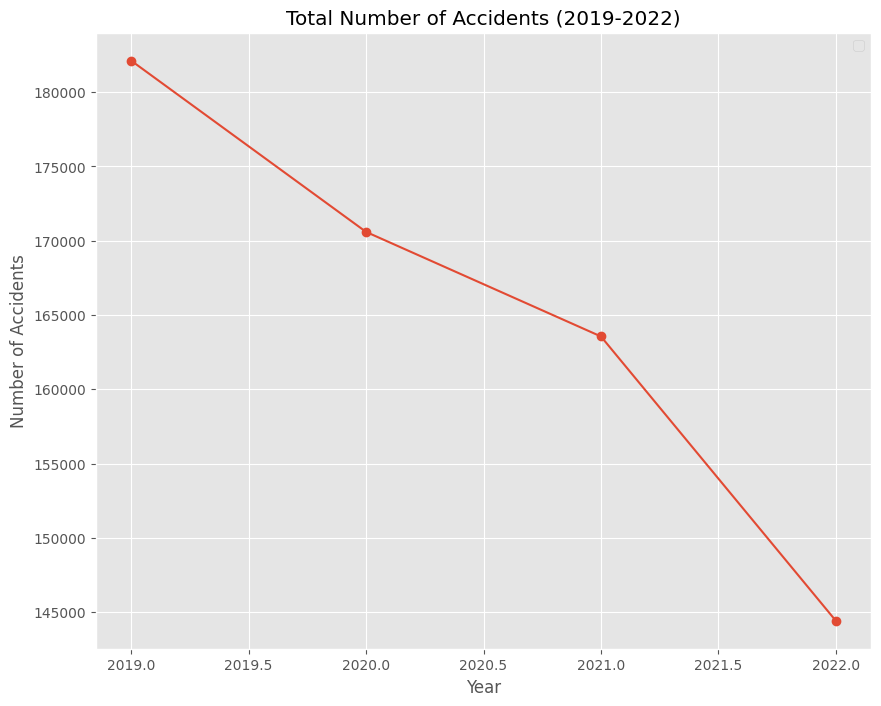

In [47]:
accident_count_yearly = df['Year'].value_counts()

plt.plot(accident_count_yearly.index, accident_count_yearly.values, marker='o')
plt.title("Total Number of Accidents (2019-2022)")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.gcf().set_size_inches(10, 8)
plt.legend()
plt.show()

<hr>

<h3><span style='color: Green;'>QUESTION 15</span> : In what light condition does the highest average of number of casualties has been recorded while considering the road type?</h3>

In [48]:
new_df = np.round(df.groupby(['Light_Conditions', 'Road_Type'], observed=False)['Number_of_Casualties'].mean(), 2)
new_df.unstack()

Road_Type,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road,uncouted
Light_Conditions,,,,,,
Darkness - lighting unknown,1.39,1.19,1.26,1.30,1.35,1.34
Darkness - lights lit,1.49,1.23,1.33,1.35,1.49,1.32
Darkness - lights unlit,1.44,1.17,1.28,1.32,1.18,1.30
Darkness - no lighting,1.58,1.48,1.31,1.53,1.65,1.41
Daylight,1.46,1.18,1.26,1.33,1.39,1.22


<h3><span style='color: Red;'>INSIGHT #15 :</span> The analysis reveals that darkness with no lighting on slip roads results in the highest average number of casualties per accident, with an average of 1.65 casualties per incident. This suggests that poor visibility and road type play a significant role in accident severity.</h3>

<h3><span style='color: yellow;'>INSIGHT #15:</span> VISUALIZATION</h3>

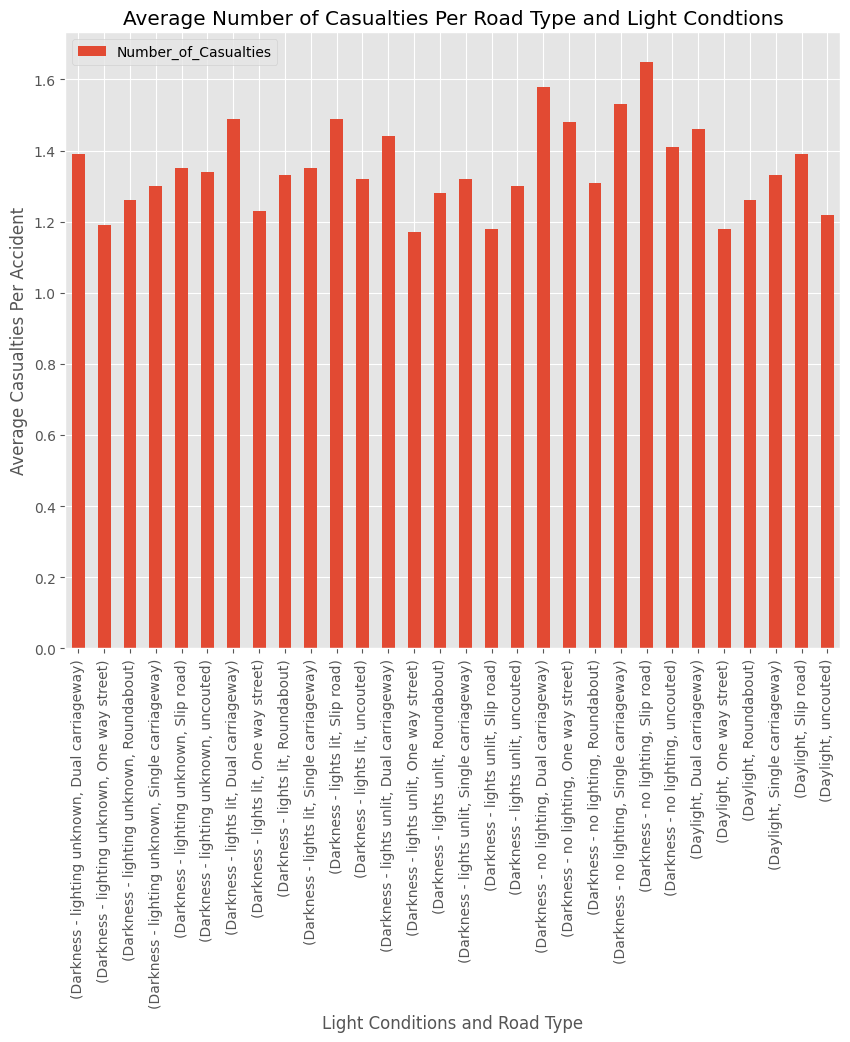

In [84]:
new_df.plot(kind='bar')

plt.title('Average Number of Casualties Per Road Type and Light Condtions')
plt.ylabel('Average Casualties Per Accident')
plt.xlabel('Light Conditions and Road Type')
plt.gcf().set_size_inches(10, 8)
plt.legend()
plt.show()

<hr>

<h3><span style='color: Green;'>QUESTION 16</span> : In what road type does the highest number of inccident occurs while road surface is considered and in what severity?</h3>

In [49]:
df.groupby(['Road_Type', 'Accident_Severity', 'Road_Surface_Conditions'], observed=False)['Index'].count().unstack()

Road_Surface_Conditions                  Dry  Flood over 3cm. deep  \
Road_Type          Accident_Severity                                 
Dual carriageway   Fatal                1217                     5   
                   Serious              8099                    42   
                   Slight              56889                   255   
One way street     Fatal                  74                     0   
                   Serious              1243                     3   
                   Slight               8751                     2   
Roundabout         Fatal                 110                     0   
                   Serious              2633                     2   
                   Slight              27955                    20   
Single carriageway Fatal                4336                    18   
                   Serious             48873                   103   
                   Slight             279489                   551   
Slip road          Fatal                  30                     0   
                   Serious               419                     1   
                   Slight               4265                     8   
uncouted           Fatal                  21                     0   
                   Serious               371                     1   
                   Slight               3046                     6   

Road_Surface_Conditions               Frost or ice  Snow  Wet or damp  \
Road_Type          Accident_Severity                                    
Dual carriageway   Fatal                        36     6          551   
                   Serious                     259   108         3233   
                   Slight                     2113   795        25749   
One way street     Fatal                         0     2           19   
                   Serious                      15     7          383   
                   Slight                      168    67         2793   
Roundabout         Fatal                         3     2           27   
                   Serious                      60    12          951   
                   Slight                      682   218        11231   
Single carriageway Fatal                       153    25         1993   
                   Serious                    1651   427        18952   
                   Slight                    13114  4133       117798   
Slip road          Fatal                         1     0           18   
                   Serious                      15     9          167   
                   Slight                      162    51         1889   
uncouted           Fatal                         0     0           12   
                   Serious                       7     2           99   
                   Slight                       78    26          843   

Road_Surface_Conditions               uncouted  
Road_Type          Accident_Severity            
Dual carriageway   Fatal                     0  
                   Serious                   5  
                   Slight                   62  
One way street     Fatal                     0  
                   Serious                   4  
                   Slight                   28  
Roundabout         Fatal                     0  
                   Serious                   7  
                   Slight                   79  
Single carriageway Fatal                     2  
                   Serious                  53  
                   Slight                  472  
Slip road          Fatal                     0  
                   Serious                   0  
                   Slight                    6  
uncouted           Fatal                     0  
                   Serious                   1  
                   Slight                    7

<h3><span style='color: Red;'>INSIGHT #16 :</span> The analysis reveals that accidents occur most frequently on single carriageway roads with dry road surface conditions. However, these accidents are predominantly categorized as slight severity, indicating that while this road type experiences high accident volume, the impact of these incidents is generally less severe.</h3>

<h3><span style='color: yellow;'>INSIGHT #16:</span> VISUALIZATION</h3>

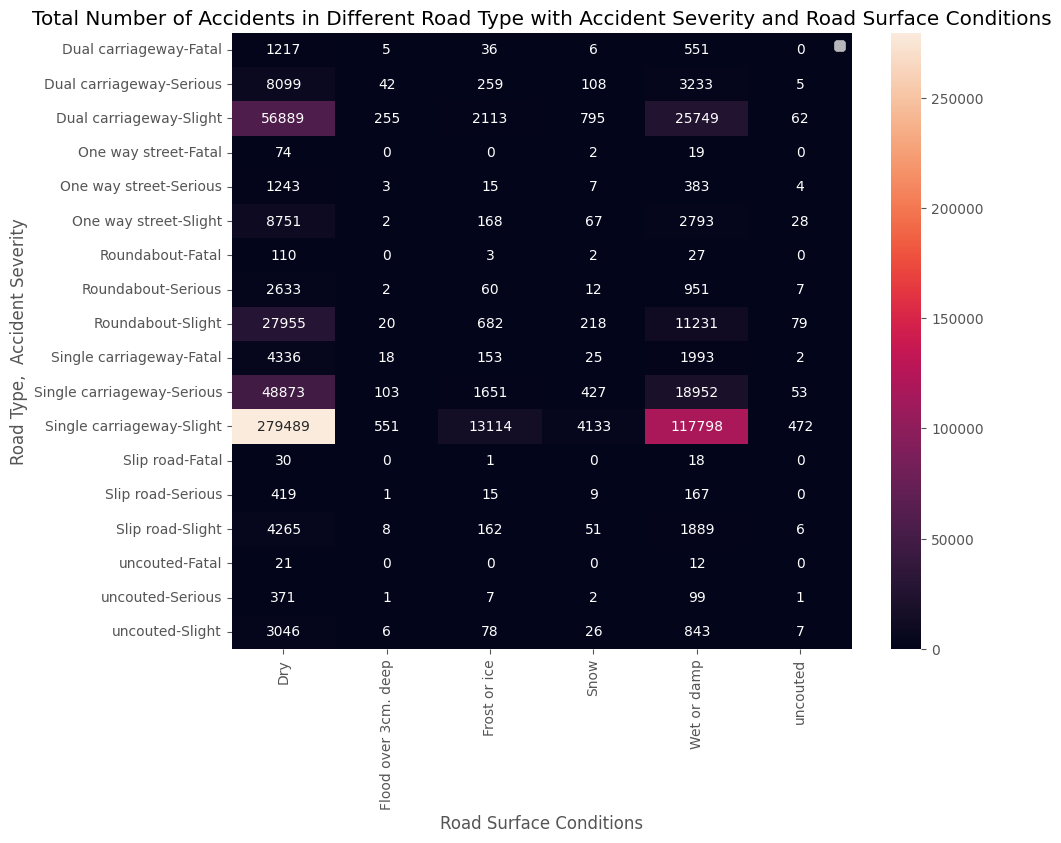

In [50]:
road_type_surface_conditions_severity = df.groupby(['Road_Type', 'Accident_Severity', 'Road_Surface_Conditions']).size().unstack()

sns.heatmap(road_type_surface_conditions_severity, annot=True, fmt='g')

plt.title("Total Number of Accidents in Different Road Type with Accident Severity and Road Surface Conditions")
plt.xlabel("Road Surface Conditions")
plt.ylabel("Road Type,  Accident Severity")
plt.gcf().set_size_inches(10, 8)
plt.legend()
plt.show()

<hr>

<h3><span style='color: Green;'>QUESTION 17</span> : Who got highest number accident in the past 4 year is it Urban or Rual area in consideration of the accident severity and the day of the week?</h3>

In [51]:
df.groupby(['Urban_or_Rural_Area', 'Accident_Severity', 'DayOfWeek'], observed=False)['Index'].count().unstack()

DayOfWeek                                  0      1      2      3      4  \
Urban_or_Rural_Area Accident_Severity                                      
Rural               Fatal                984    729    684    695    702   
                    Serious             5911   4913   4924   5015   5109   
                    Slight             23389  27883  29245  29048  28312   
Unallocated         Fatal                  0      0      0      0      0   
                    Serious                1      0      0      0      0   
                    Slight                 2      1      4      5      6   
Urban               Fatal                401    376    429    402    411   
                    Serious             5752   7005   7564   7425   7524   
                    Slight             36240  53643  56708  56921  55836   

DayOfWeek                                  5      6  
Urban_or_Rural_Area Accident_Severity                
Rural               Fatal                813    994  
                    Serious             5597   5843  
                    Slight             31583  26617  
Unallocated         Fatal                  0      0  
                    Serious                1      1  
                    Slight                 4      1  
Urban               Fatal                513    528  
                    Serious             8402   7230  
                    Slight             60265  48088

<h3><span style='color: Red;'>INSIGHT #17 :</span> The analysis reveals that urban areas have recorded the highest number of accidents over the past four years while putting into account the day of the week and accident severity. Most of these accidents occurred on Saturdays and were classified as slight in terms of severity.</h3>

<h3><span style='color: yellow;'>INSIGHT #17:</span> VISUALIZATION</h3>

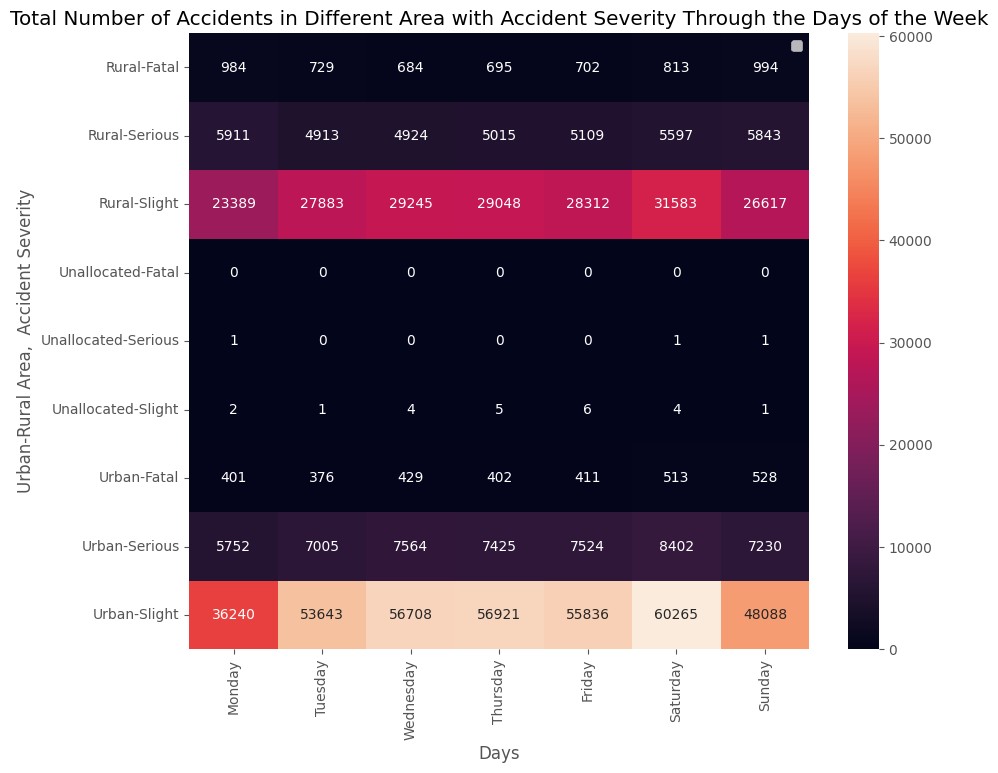

In [52]:
new_accident_df = df.copy()
new_accident_df['DayOfWeek'] = new_accident_df['DayOfWeek'].map(day_map)

area_severity_days = new_accident_df.groupby(['Urban_or_Rural_Area', 'Accident_Severity', 'DayOfWeek']).size().unstack()
sns.heatmap(area_severity_days, annot=True, fmt='g')

plt.title("Total Number of Accidents in Different Area with Accident Severity Through the Days of the Week")
plt.xlabel("Days")
plt.ylabel("Urban-Rural Area,  Accident Severity")
plt.gcf().set_size_inches(10, 8)
plt.legend()
plt.show()


<hr>

<h3><span style='color: Green;'>QUESTION 18</span> : In what area and road type has recorded the highest number accident while considering the weather condition?</h3>

In [53]:
df.groupby(['Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions'], observed=False)['Index'].count().unstack()

Weather_Conditions                      Fine + high winds  Fine no high winds  \
Road_Type          Urban_or_Rural_Area                                          
Dual carriageway   Rural                              874               37018   
                   Unallocated                          0                   3   
                   Urban                              645               39895   
One way street     Rural                               13                 946   
                   Unallocated                          0                   1   
                   Urban                              145               10110   
Roundabout         Rural                              204               12375   
                   Unallocated                          0                   0   
                   Urban                              336               22292   
Single carriageway Rural                             2816              127278   
                   Unallocated                          1                  10   
                   Urban                             3361              262542   
Slip road          Rural                               74                3342   
                   Unallocated                          0                   0   
                   Urban                               35                2178   
uncouted           Rural                               12                 833   
                   Unallocated                          0                   3   
                   Urban                               38                2059   

Weather_Conditions                      Fog or mist  Other  \
Road_Type          Urban_or_Rural_Area                       
Dual carriageway   Rural                        513   1047   
                   Unallocated                    0      0   
                   Urban                        169   1217   
One way street     Rural                          7     31   
                   Unallocated                    0      0   
                   Urban                         22    278   
Roundabout         Rural                        124    369   
                   Unallocated                    0      0   
                   Urban                         98    740   
Single carriageway Rural                       1706   5739   
                   Unallocated                    0      0   
                   Urban                        835   7417   
Slip road          Rural                         25    103   
                   Unallocated                    0      0   
                   Urban                          8     77   
uncouted           Rural                         10     48   
                   Unallocated                    0      0   
                   Urban                         11     84   

Weather_Conditions                      Raining + high winds  \
Road_Type          Urban_or_Rural_Area                         
Dual carriageway   Rural                                1269   
                   Unallocated                             0   
                   Urban                                 764   
One way street     Rural                                  18   
                   Unallocated                             0   
                   Urban                                 135   
Roundabout         Rural                                 200   
                   Unallocated                             0   
                   Urban                                 363   
Single carriageway Rural                                3145   
                   Unallocated                             0   
                   Urban                                3558   
Slip road          Rural                                  70   
                   Unallocated                             0   
                   Urban                                  37   
uncouted           Rural                          

<h3><span style='color: Red;'>INSIGHT #18 :</span> The analysis shows that in urban areas, single carriageway roads under fine weather conditions with no winds recorded the highest number of accidents over the past four years. This suggests that even in seemingly ideal driving conditions, high traffic density and urban road structures contribute significantly to accident frequency.</h3>

<h3><span style='color: yellow;'>INSIGHT #18:</span> VISUALIZATION</h3>

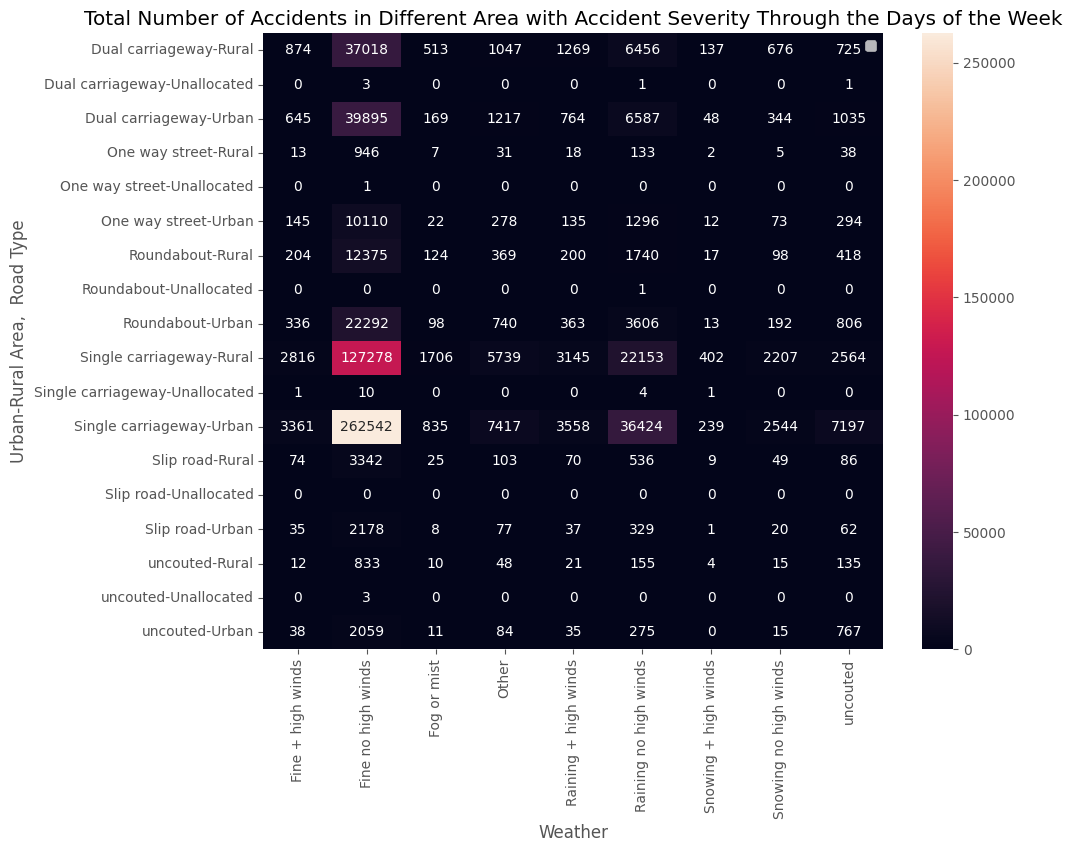

In [54]:
road_type_area_weather = df.groupby(['Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions']).size().unstack()
sns.heatmap(road_type_area_weather, annot=True, fmt='g')

plt.title("Total Number of Accidents in Different Area with Accident Severity Through the Days of the Week")
plt.xlabel("Weather")
plt.ylabel("Urban-Rural Area,  Road Type")
plt.gcf().set_size_inches(10, 8)
plt.legend()
plt.show()


<hr>

<h3><span style='color: Green;'>QUESTION 19</span> : In what area and light conditions type has recorded the highest number accident while considering the weather condition?</h3>

In [55]:
df.groupby(['Light_Conditions', 'Urban_or_Rural_Area', 'Weather_Conditions'], observed=False)['Number_of_Casualties'].count().unstack()

Weather_Conditions                               Fine + high winds  \
Light_Conditions            Urban_or_Rural_Area                      
Darkness - lighting unknown Rural                               30   
                            Unallocated                          0   
                            Urban                               29   
Darkness - lights lit       Rural                              426   
                            Unallocated                          0   
                            Urban                             1426   
Darkness - lights unlit     Rural                               24   
                            Unallocated                          0   
                            Urban                               27   
Darkness - no lighting      Rural                              766   
                            Unallocated                          0   
                            Urban                               30   
Daylight                    Rural                             2747   
                            Unallocated                          1   
                            Urban                             3048   

Weather_Conditions                               Fine no high winds  \
Light_Conditions            Urban_or_Rural_Area                       
Darkness - lighting unknown Rural                              1475   
                            Unallocated                           0   
                            Urban                              2208   
Darkness - lights lit       Rural                             17018   
                            Unallocated                           2   
                            Urban                             74931   
Darkness - lights unlit     Rural                               645   
                            Unallocated                           1   
                            Urban                              1054   
Darkness - no lighting      Rural                             23586   
                            Unallocated                           1   
                            Urban                              1280   
Daylight                    Rural                            139068   
                            Unallocated                          13   
                            Urban                            259603   

Weather_Conditions                               Fog or mist  Other  \
Light_Conditions            Urban_or_Rural_Area                       
Darkness - lighting unknown Rural                         41     81   
                            Unallocated                    0      0   
                            Urban                         24    105   
Darkness - lights lit       Rural                        323   1029   
                            Unallocated                    0      0   
                            Urban                        598   3774   
Darkness - lights unlit     Rural                         14     58   
                            Unallocated                    0      0   
                            Urban                         23     85   
Darkness - no lighting      Rural                        832   1832   
                            Unallocated                    0      0   
                            Urban                         30     83   
Daylight                    Rural                       1175   4337   
                            Unallocated                    0      0   
                            Urban                        468   5766   

Weather_Conditions                               Raining + high winds  \
Light_Conditions            Urban_or_Rural_Area                         
Darkness - lighting unknown Rural                                  34   
                            Unallocated                             0   
                            Urban                                  77   
Darkness - lights lit       

<h3><span style='color: Red;'>INSIGHT #19 :</span> The analysis reveals that 259,603 accidents occurred under daylight conditions in urban areas with fine weather and no high winds. This indicates that clear weather and urban environments still present significant accident risks, likely due to higher traffic volumes, intersections, and pedestrian activity.</h3>

<h3><span style='color: yellow;'>INSIGHT #19:</span> VISUALIZATION</h3>

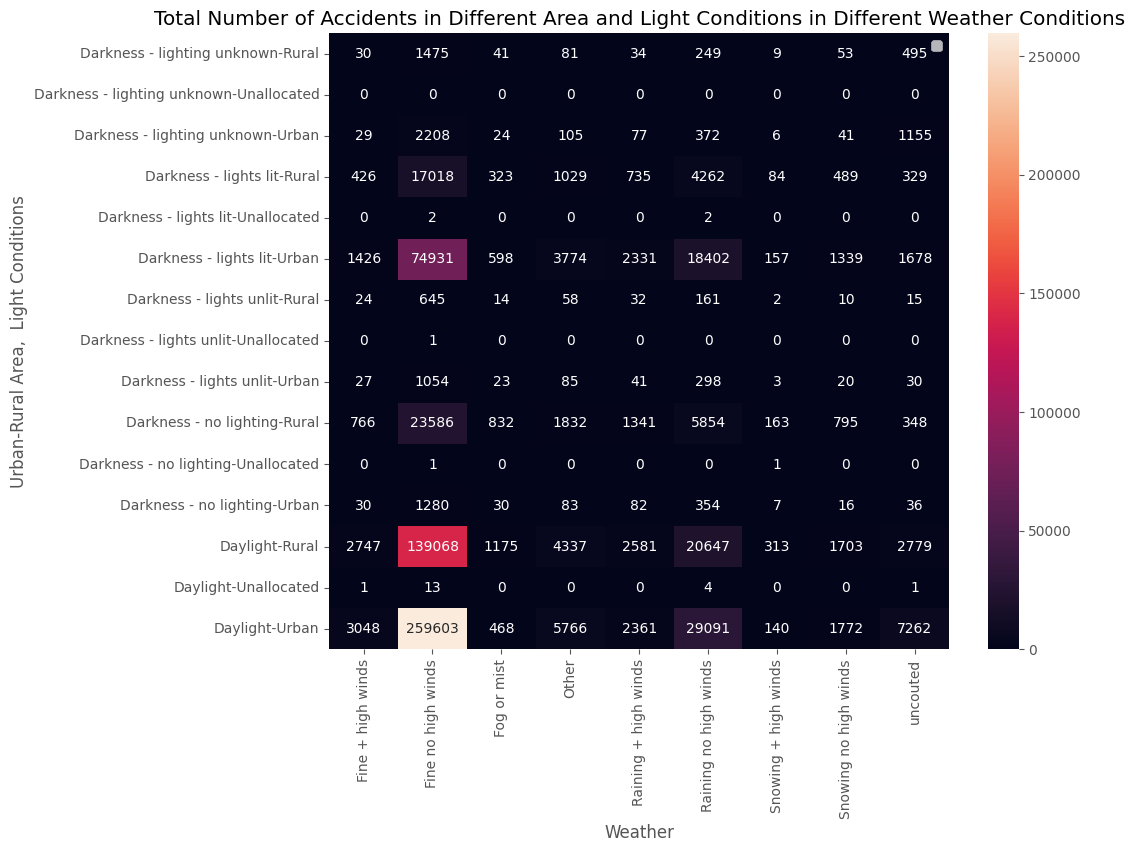

In [56]:
light_area_weather = df.groupby(['Light_Conditions', 'Urban_or_Rural_Area', 'Weather_Conditions']).size().unstack()
sns.heatmap(light_area_weather, annot=True, fmt='g')

plt.title("Total Number of Accidents in Different Area and Light Conditions in Different Weather Conditions")
plt.xlabel("Weather")
plt.ylabel("Urban-Rural Area,  Light Conditions")
plt.gcf().set_size_inches(10, 8)
plt.legend()
plt.show()

<hr>

<h3><span style='color: Green;'>QUESTION 20</span> : In what light condition and road surface conditions type has recorded the highest number of casualties while considering the weather condition?</h3>

In [57]:
df.groupby(['Light_Conditions', 'Road_Surface_Conditions', 'Weather_Conditions'], observed=False)['Number_of_Vehicles'].sum().unstack()

Weather_Conditions                                   Fine + high winds  \
Light_Conditions            Road_Surface_Conditions                      
Darkness - lighting unknown Dry                                     60   
                            Flood over 3cm. deep                     3   
                            Frost or ice                             7   
                            Snow                                     0   
                            Wet or damp                             46   
                            uncouted                                 0   
Darkness - lights lit       Dry                                   1672   
                            Flood over 3cm. deep                     3   
                            Frost or ice                            75   
                            Snow                                     9   
                            Wet or damp                           1486   
                            uncouted                                 0   
Darkness - lights unlit     Dry                                     55   
                            Flood over 3cm. deep                     0   
                            Frost or ice                             4   
                            Snow                                     0   
                            Wet or damp                             39   
                            uncouted                                 0   
Darkness - no lighting      Dry                                    546   
                            Flood over 3cm. deep                     3   
                            Frost or ice                            55   
                            Snow                                     4   
                            Wet or damp                            652   
                            uncouted                                 1   
Daylight                    Dry                                   6671   
                            Flood over 3cm. deep                    14   
                            Frost or ice                           141   
                            Snow                                    21   
                            Wet or damp                           3650   
                            uncouted                                 4   

Weather_Conditions                                   Fine no high winds  \
Light_Conditions            Road_Surface_Conditions                       
Darkness - lighting unknown Dry                                    5195   
                            Flood over 3cm. deep                      0   
                            Frost or ice                            200   
                            Snow                                     27   
                            Wet or damp                            1087   
                            uncouted                                  1   
Darkness - lights lit       Dry                                  118818   
                            Flood over 3cm. deep                     24   
                            Frost or ice                           4092   
                            Snow                                    327   
                            Wet or damp                           39693   
                            uncouted                                 46   
Darkness - lights unlit     Dry                                    2248   
                            Flood over 3cm. deep                      3   
                            Frost or ice                            108   
                            Snow                                     10   
                            Wet or damp                             629   
                            uncouted                                  1   
Darkness - no lighting      Dry                                   24118   
                            Flood over 3cm. deep        

<h3><span style='color: Red;'>INSIGHT #20 :</span> The analysis reveals that daylight conditions, dry road surfaces, and fine weather with no high winds resulted in the highest number of casualties, totaling 638,140. This suggests that while visibility is good, factors such as wind gusts and driver behavior in open areas may contribute to accident severity.</h3>

<h3><span style='color: yellow;'>INSIGHT #20:</span> VISUALIZATION</h3>

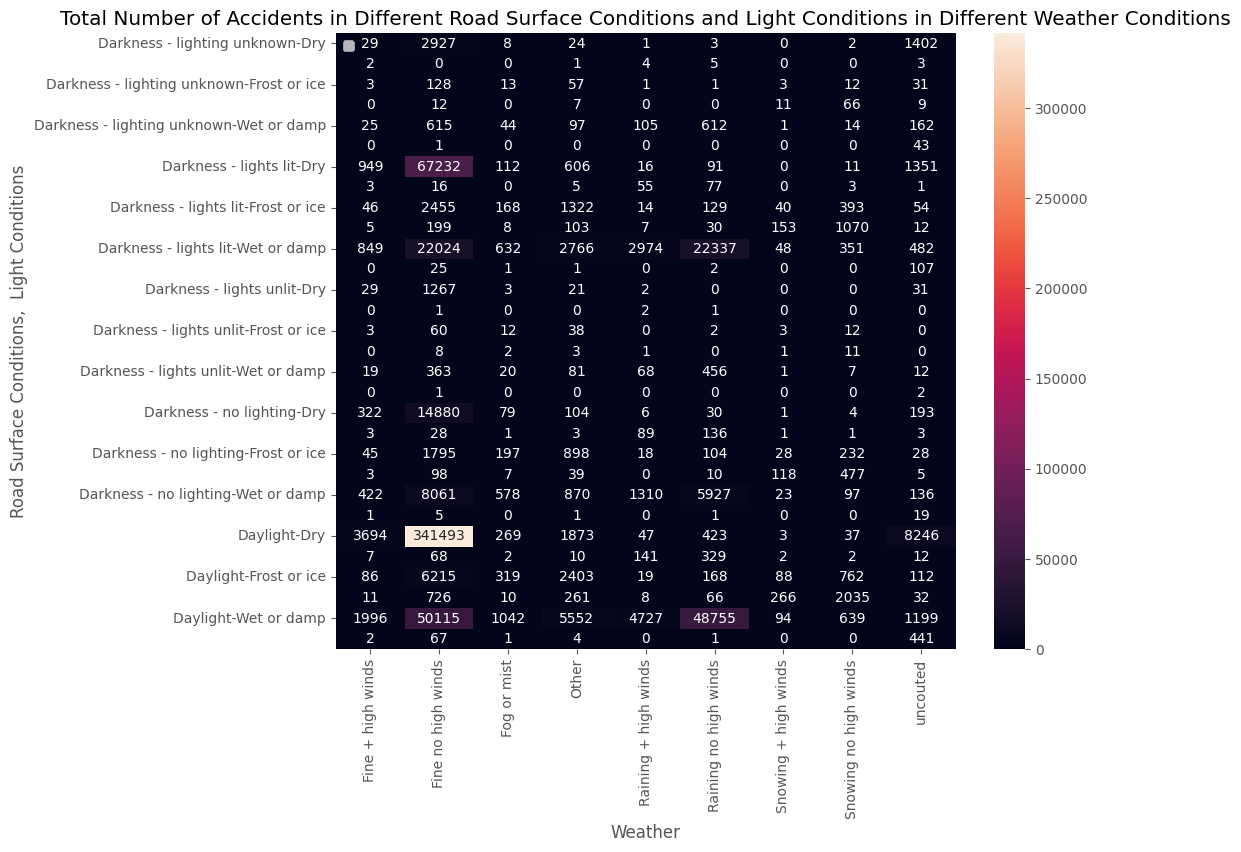

In [58]:
light_surface_weather = df.groupby(['Light_Conditions', 'Road_Surface_Conditions', 'Weather_Conditions']).size().unstack()
sns.heatmap(light_surface_weather, annot=True, fmt='g')

plt.title("Total Number of Accidents in Different Road Surface Conditions and Light Conditions in Different Weather Conditions")
plt.xlabel("Weather")
plt.ylabel("Road Surface Conditions,  Light Conditions")
plt.gcf().set_size_inches(10, 8)
plt.legend()
plt.show()

<hr>

<h3><span style='color: Green;'>QUESTION 21</span> : Accident recorded in Birmingham with Fatal severity and what day of the week.</h3>

In [59]:
pro =  new_accident_df[new_accident_df['Accident_Severity'] == 'Fatal']

In [60]:
birmingham_fatal = pro[pro['District Area'] == 'Birmingham']

In [61]:
birmingham_fatal[birmingham_fatal['Light_Conditions'] == 'Daylight']['DayOfWeek'].value_counts()

DayOfWeek
Wednesday    11
Sunday       11
Friday       10
Monday        7
Saturday      6
Tuesday       5
Thursday      3
Name: count, dtype: int64

<h3><span style='color: Red;'>INSIGHT #21 :</span> Base on the analysis 53 number of accident where recorded in Birmingham with Fatal severity. The recorded accident happen is break down in days of the week showing that Sunday and Wednesday got the highest which is both 11 (20.75%) and Thursday got the lowest which is 3 (5.66%).</h3>

<h3><span style='color: yellow;'>INSIGHT #21:</span> VISUALIZATION</h3>

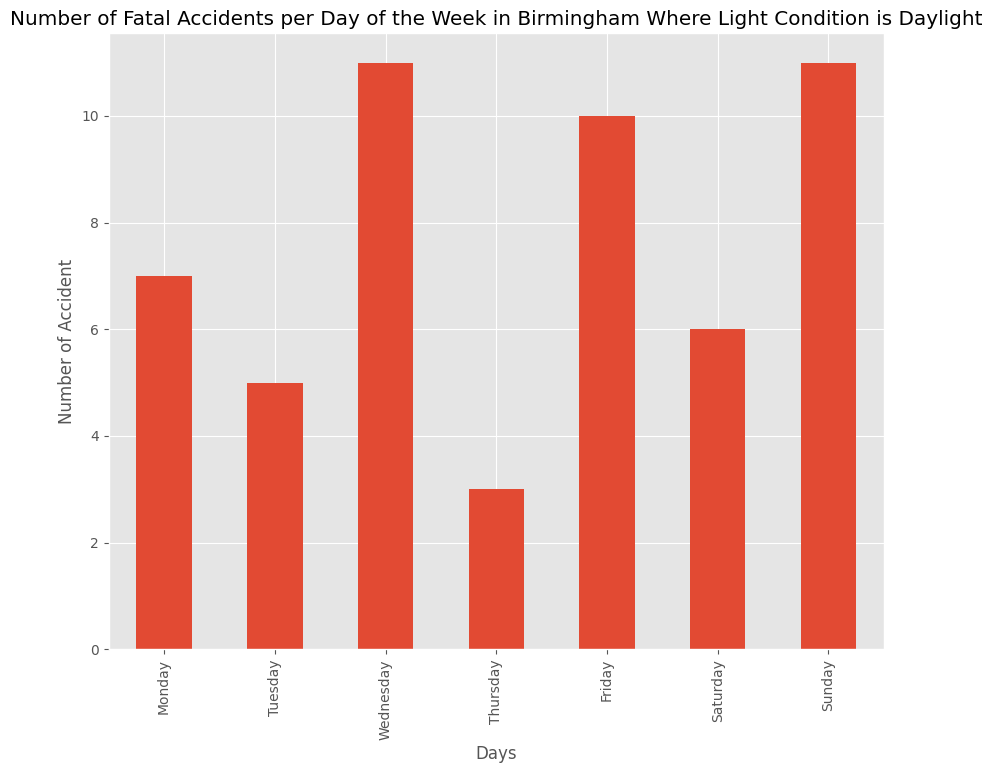

In [62]:
birmingham_fatal_daylight = birmingham_fatal[birmingham_fatal['Light_Conditions'] == 'Daylight']
birmingham_daylight_fatal_accident_per_days = birmingham_fatal_daylight['DayOfWeek'].value_counts().sort_index()

birmingham_daylight_fatal_accident_per_days.plot(kind='bar')
plt.title('Number of Fatal Accidents per Day of the Week in Birmingham Where Light Condition is Daylight')
plt.xlabel('Days')
plt.ylabel('Number of Accident')
plt.gcf().set_size_inches(10, 8)
plt.show()

<hr>

In [63]:
dark_no_light = df[df['Light_Conditions'] == 'Darkness - no lighting']

dark_no_light['Accident_Severity'].value_counts()

Accident_Severity
Slight     28651
Serious     7174
Fatal       1612
Name: count, dtype: int64

In [64]:
dark_no_light[dark_no_light['Accident_Severity'] == 'Slight']['Number_of_Vehicles'].mean()

np.float64(1.5943597082126277)

<h1>Area Analysis</h1>

In [65]:
df.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type', 'Year', 'Month', 'Day', 'DayOfWeek'],
      dtype='object')

<h3>Creating a bar plot</h3>

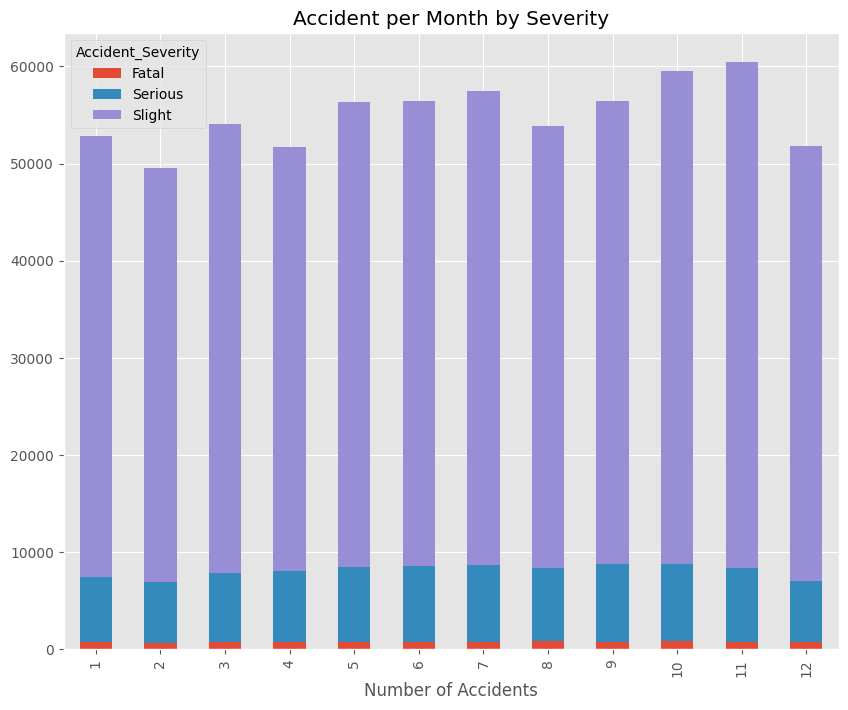

In [66]:
accident_per_month_severity = df.groupby(['Month','Accident_Severity']).size().unstack()

accident_per_month_severity.plot(kind='bar', stacked=True)

plt.title('Accident per Month by Severity')
plt.xlabel('Month')
plt.xlabel('Number of Accidents')
plt.gcf().set_size_inches(10, 8)
plt.show()

In [67]:
area_year = df.groupby(['District Area','Year']).size().reset_index(name='Accident Count')

pivot_table = area_year.pivot(index='Year', columns='District Area', values='Accident Count')
pivot_table

District Area,Aberdeen City,Aberdeenshire,Adur,Allerdale,Alnwick,Amber Valley,Angus,Argyll and Bute,Arun,Ashfield,...,Wokingham,Wolverhampton,Worcester,Worthing,Wrexham,Wychavon,Wycombe,Wyre,Wyre Forest,York
Year,,,,,,,,,,,,,,,,,,,,,
2019,365,552,171,305,107,397,282,268,367,401,...,356,710,215,291,333,366,502,328,230,503
2020,513,691,164,299,105,321,282,288,356,338,...,349,609,210,244,340,389,449,295,230,459
2021,445,687,155,298,20,335,232,280,338,340,...,303,633,239,255,318,323,397,321,273,484
2022,0,0,129,226,0,294,0,0,315,316,...,302,514,194,218,311,283,381,294,236,451


<h3>Creating a line plot</h3>

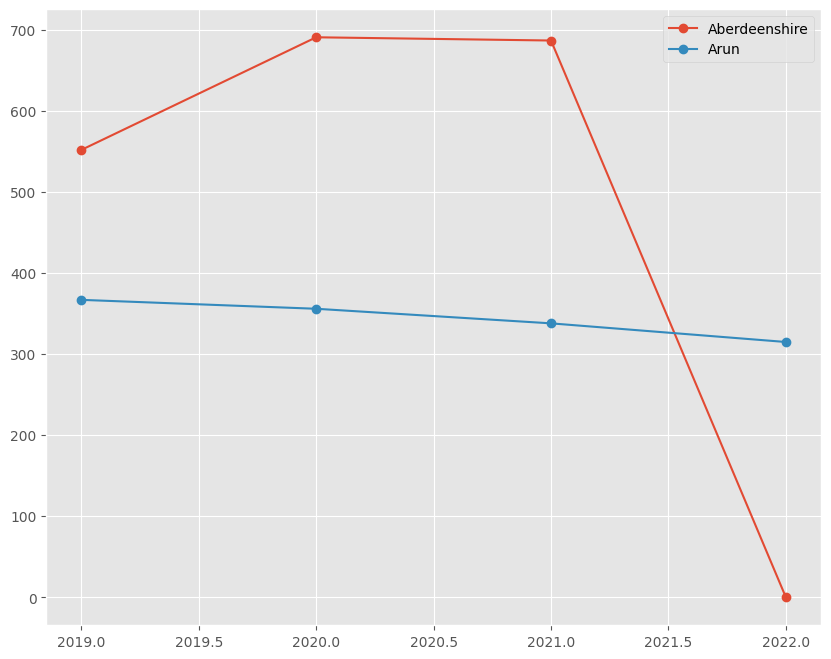

In [68]:
plt.plot(pivot_table.index, pivot_table['Aberdeenshire'], label='Aberdeenshire', marker='o')
plt.plot(pivot_table.index, pivot_table['Arun'], label='Arun', marker='o')
plt.legend()
plt.gcf().set_size_inches(10, 8)
plt.show()

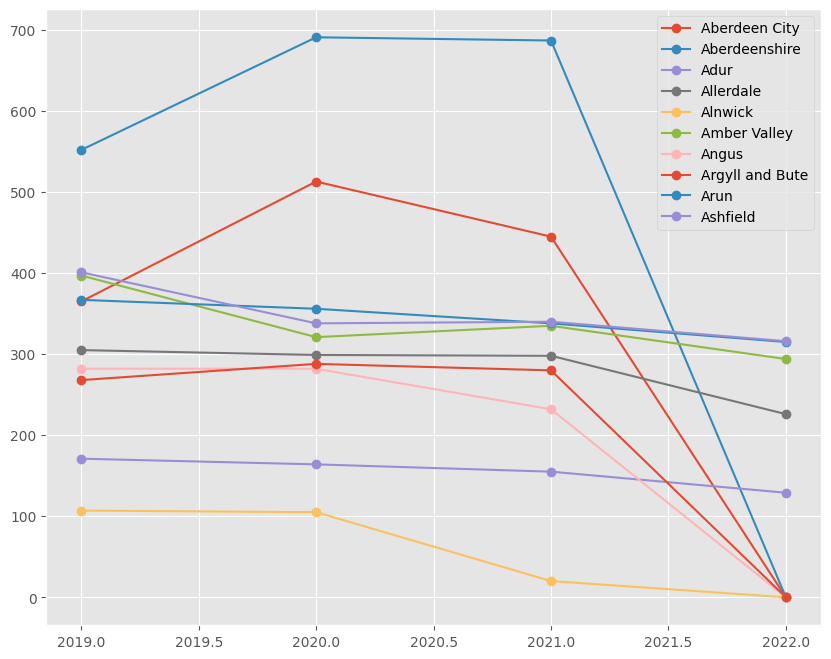

In [69]:
count = 0

for x in pivot_table:
    count += 1
    plt.plot(pivot_table.index, pivot_table[x], label=x, marker='o')
    if count == 10:
        break
        
plt.gcf().set_size_inches(10, 8)
plt.legend()
plt.show()

<h3>Heatmap</h3>

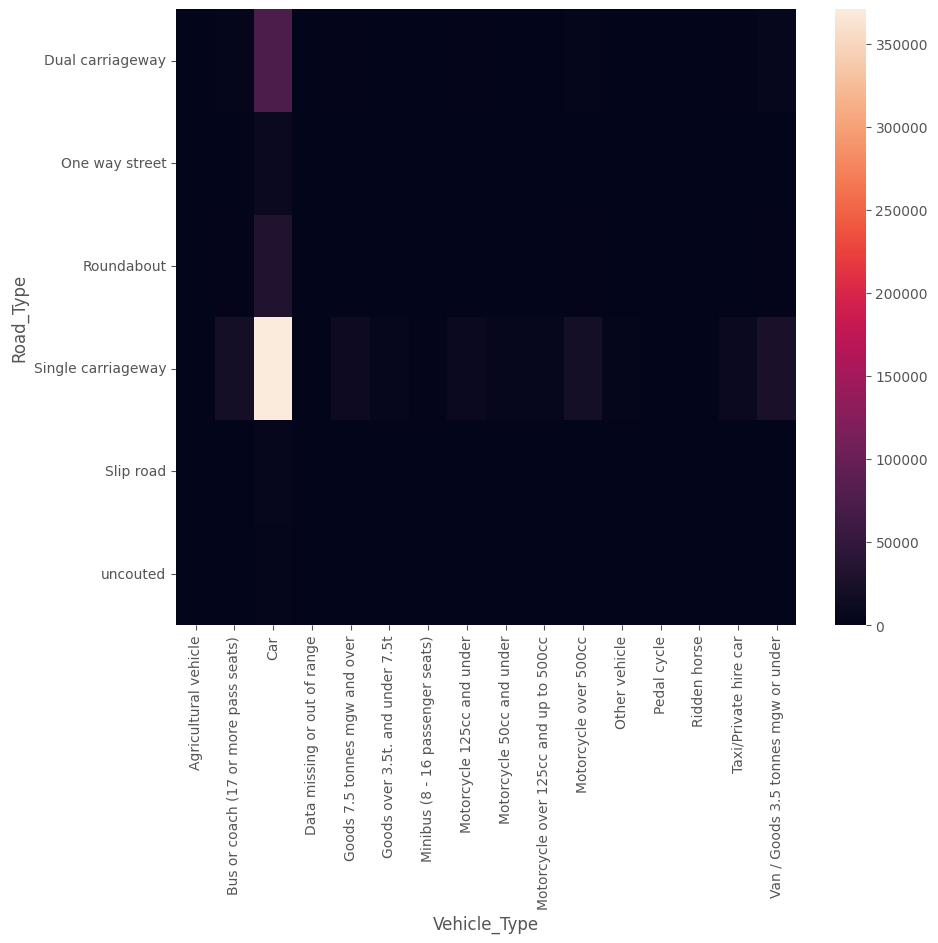

In [70]:
type_vh = df.groupby(['Road_Type', 'Vehicle_Type']).size().unstack()
plt.gcf().set_size_inches(10, 8)
sns.heatmap(type_vh)
plt.style.use('ggplot')
plt.show()

In [71]:
accident_per_day = df['DayOfWeek'].value_counts().sort_index()

day_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accident_per_day.index = accident_per_day.index.map(day_map)